In [88]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [25]:
# Importar datos
automobile = fetch_ucirepo(id=10) 
cars = automobile.data.features 
cars.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


Quitar columnas con valores nulos

In [30]:
df_cars = cars

In [31]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

Quitar normalized-losses porque tienen muchos nulos

In [32]:
df_cars = df_cars.drop('normalized-losses', axis=1)
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

Quitar filas con datos nulos

In [33]:
df_cars = df_cars.dropna()
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              193 non-null    float64
 1   highway-mpg        193 non-null    int64  
 2   city-mpg           193 non-null    int64  
 3   peak-rpm           193 non-null    float64
 4   horsepower         193 non-null    float64
 5   compression-ratio  193 non-null    float64
 6   stroke             193 non-null    float64
 7   bore               193 non-null    float64
 8   fuel-system        193 non-null    object 
 9   engine-size        193 non-null    int64  
 10  num-of-cylinders   193 non-null    int64  
 11  engine-type        193 non-null    object 
 12  curb-weight        193 non-null    int64  
 13  height             193 non-null    float64
 14  width              193 non-null    float64
 15  length             193 non-null    float64
 16  wheel-base         193 non-null

Lo que se quiere predecir es el precio del auto, la variable objetivo es la
columna **price**.

Voy a crear un dataframe X con las variables independientes, y el series y
con la dependiente.

In [48]:
X = df_cars.drop('price', axis=1)
X.head()

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,4,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
1,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,4,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
2,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,6,...,65.5,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero
3,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,4,...,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi
4,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,5,...,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi


In [39]:
y = df_cars['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   highway-mpg        193 non-null    int64  
 1   city-mpg           193 non-null    int64  
 2   peak-rpm           193 non-null    float64
 3   horsepower         193 non-null    float64
 4   compression-ratio  193 non-null    float64
 5   stroke             193 non-null    float64
 6   bore               193 non-null    float64
 7   fuel-system        193 non-null    object 
 8   engine-size        193 non-null    int64  
 9   num-of-cylinders   193 non-null    int64  
 10  engine-type        193 non-null    object 
 11  curb-weight        193 non-null    int64  
 12  height             193 non-null    float64
 13  width              193 non-null    float64
 14  length             193 non-null    float64
 15  wheel-base         193 non-null    float64
 16  engine-location    193 non-null

Usar únicamente variables numéricas

In [50]:
numerical = [
    'highway-mpg','city-mpg','peak-rpm','horsepower',
    'compression-ratio','stroke','bore','engine-size',
    'num-of-cylinders','curb-weight','height','width',
    'length','wheel-base','num-of-doors'
]

X = X[numerical]
X.head()

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors
0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0
1,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0
2,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,2823,52.4,65.5,171.2,94.5,2.0
3,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,2337,54.3,66.2,176.6,99.8,4.0
4,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,2824,54.3,66.4,176.6,99.4,4.0


Normalizar datos

In [51]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors
0,-0.557058,-0.679053,-0.213359,0.198569,-0.288273,-1.808186,0.513027,0.045215,-0.411247,-0.025713,-2.122598,-0.841263,-0.444024,-1.682379,-1.175889
1,-0.557058,-0.679053,-0.213359,0.198569,-0.288273,-1.808186,0.513027,0.045215,-0.411247,-0.025713,-2.122598,-0.841263,-0.444024,-1.682379,-1.175889
2,-0.704134,-0.992963,-0.213359,1.334283,-0.288273,0.702918,-2.394827,0.575559,1.548523,0.497764,-0.615412,-0.184679,-0.251195,-0.720911,-1.175889
3,-0.115832,-0.208189,0.856208,-0.039139,-0.036204,0.480415,-0.517605,-0.461021,-0.411247,-0.427362,0.180047,0.143612,0.182672,0.142781,0.850420
4,-1.292436,-1.149918,0.856208,0.304217,-0.540341,0.480415,-0.517605,0.189854,0.568638,0.499668,0.180047,0.237410,0.182672,0.077596,0.850420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.409983,-0.365144,0.642295,0.277805,-0.162238,-0.314238,1.654084,0.310387,-0.411247,0.743322,0.682442,1.409880,1.162889,1.658315,0.850420
189,-0.851209,-0.992963,0.428381,1.492755,-0.363893,-0.314238,1.654084,0.310387,-0.411247,0.927967,0.682442,1.362982,1.162889,1.658315,0.850420
190,-1.145360,-1.149918,0.856208,0.806044,-0.338686,-1.204249,0.917918,1.081795,1.548523,0.857535,0.682442,1.409880,1.162889,1.658315,0.850420
191,-0.557058,0.105721,-0.641186,0.066509,3.240689,0.480415,-1.180154,0.406813,1.548523,1.247763,0.682442,1.409880,1.162889,1.658315,0.850420


Aplicar PCA

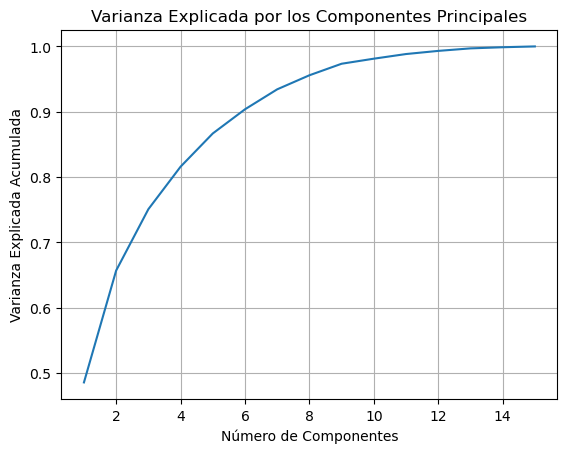

In [63]:
pca = PCA()

pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
# Mostrar la varianza explicada acumulada
import numpy as np
cumulative_variance = np.cumsum(explained_variance)
# Graficar la varianza explicada acumulada
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.grid(True)
plt.show()

6 variables ya explican el 90% de la varianza, usamos 6

In [76]:
pca = PCA(n_components=6)

pca.fit_transform(X)
X_pca = pca.fit_transform(X)
X_pca

array([[-0.85583054, -2.4078427 , -0.16099947, -2.16975666, -0.71090342,
         0.03540804],
       [-0.85583054, -2.4078427 , -0.16099947, -2.16975666, -0.71090342,
         0.03540804],
       [ 0.60125321, -2.14136282,  1.54595959,  0.72897489,  1.49415397,
         0.25503877],
       ...,
       [ 3.61369219, -0.20527389, -1.39140192, -0.20501512,  1.27995129,
        -0.37333302],
       [ 2.45392906,  2.6029619 ,  1.96118732,  0.4606214 ,  2.09334796,
        -1.01965743],
       [ 2.86312524,  0.77354594, -1.53533365,  0.30193877, -0.73634152,
        -0.60276508]])

In [77]:
df_pca = pd.DataFrame({
    'Component_1': X_pca[:,0],
    'Component_2': X_pca[:,1],
    'Component_3': X_pca[:,2],
    'Component_4': X_pca[:,3],
    'Component_5': X_pca[:,4],
    'Component_6': X_pca[:,5],
    'price': y
})
df_pca.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,price
0,-0.855831,-2.407843,-0.160999,-2.169757,-0.710903,0.035408,13495.0
1,-0.855831,-2.407843,-0.160999,-2.169757,-0.710903,0.035408,16500.0
2,0.601253,-2.141363,1.545960,0.728975,1.494154,0.255039,16500.0
3,-0.252352,0.278090,-0.650241,1.298875,0.182872,0.005683,13950.0
4,1.324108,-0.717829,-0.771273,1.320694,0.579392,0.394171,17450.0


Hacer test-train split

In [80]:
X = df_pca.drop('price', axis=1)
y = df_pca['price']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Aplicar regresión polinomial

In [100]:
# Hacer polinomio de grado 2
poly = PolynomialFeatures(degree=2)

# Transformar datos
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar con regresión lineal
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Hacer predicciones para calificar el modelo
y_pred = lr.predict(X_test_poly)
#  Evaluar con r2
r2 = r2_score(y_test, y_pred)
print("El coeficiente de determinación R^2 es:" , r2)


El coeficiente de determinación R^2 es: 0.8651305296196726


Se obtuvo un r2 de 0.87, lo cual es cercano a 1, lo que indica que se consiguió
un buen modelo.